# 1.Business Understanding 
- forecasting transactions 
- Likely regression 
- Data for 3 years 
- Advised data quality 


# 2. Data Understanding 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('regression.csv')

In [4]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [5]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [14]:
# check null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [15]:
# check uniqueness 
for col in df.columns:
    print(col, len(df[col].unique()),df[col].unique())


Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [18]:
# statistics summary 
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [19]:
# data type 
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

# Visualize Data

In [26]:
from matplotlib import pyplot as plt  
import seaborn as sns

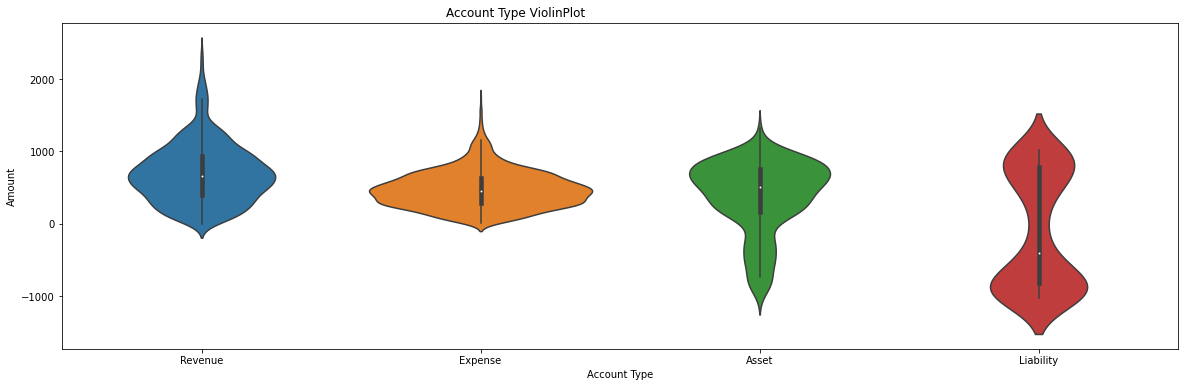

In [32]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot                                                      ')
plt.show()

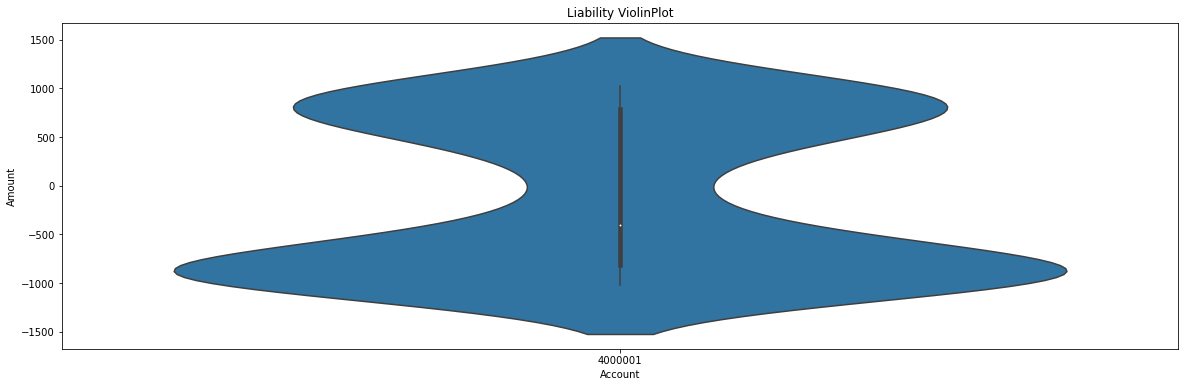

In [39]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

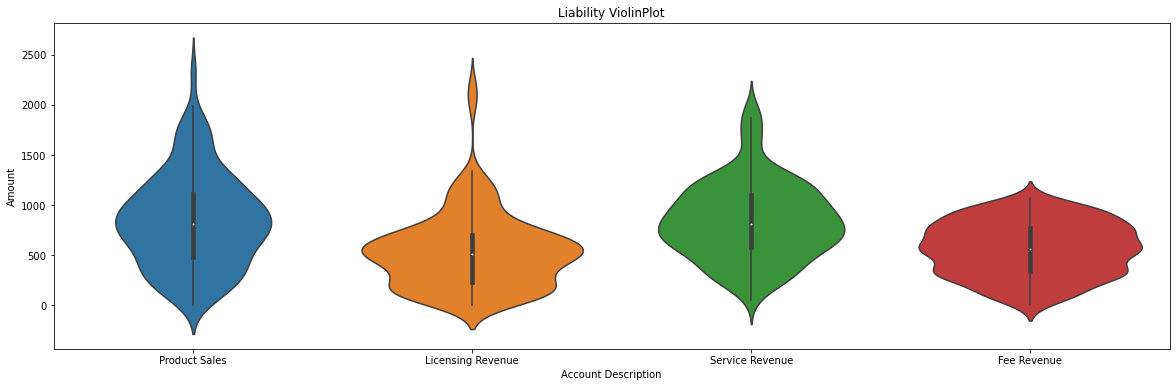

In [38]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Liability ViolinPlot')
plt.show()

# Review Trends


In [43]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [58]:
monthmap = {
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12,
}

In [59]:
df['Period'] = df ['Month'].apply(lambda x:monthmap[x])

In [60]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000,12


In [61]:
df['Day']=1

In [64]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [63]:
df['Date']= df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype()

In [67]:
df['Date']= pd.to_datetime(df['Date'])

Text(0.5, 1.0, 'Seasonal Sales')

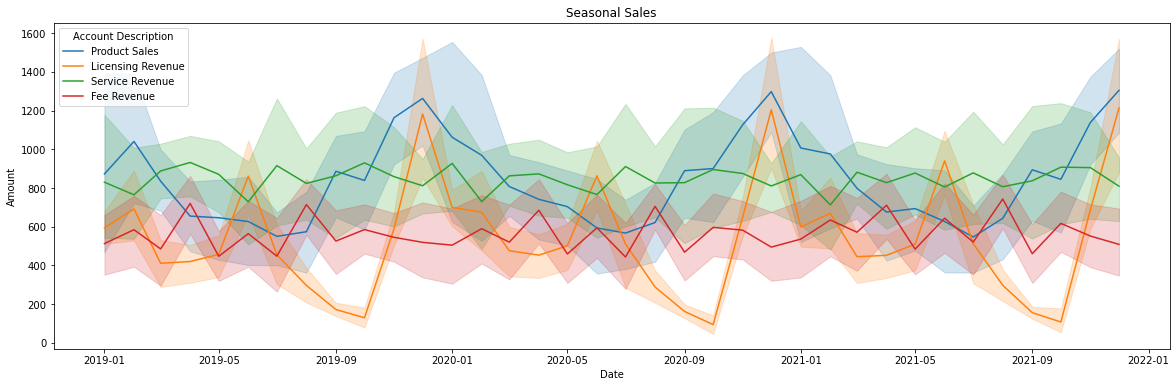

In [78]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y="Amount" ,hue="Account Description" , data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')

Text(0.5, 1.0, 'Seasonal Sales')

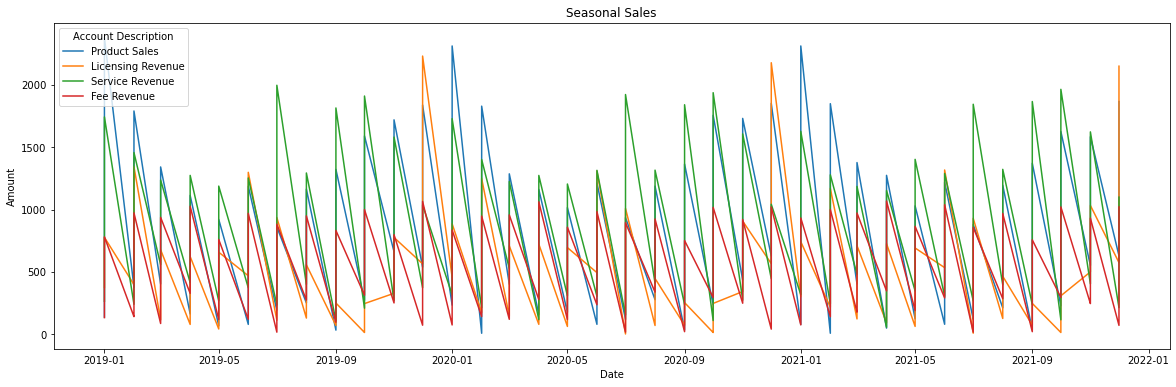

In [79]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y="Amount" ,hue="Account Description",estimator=None , data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')

Text(0.5, 1.0, 'Seasonal Sales')

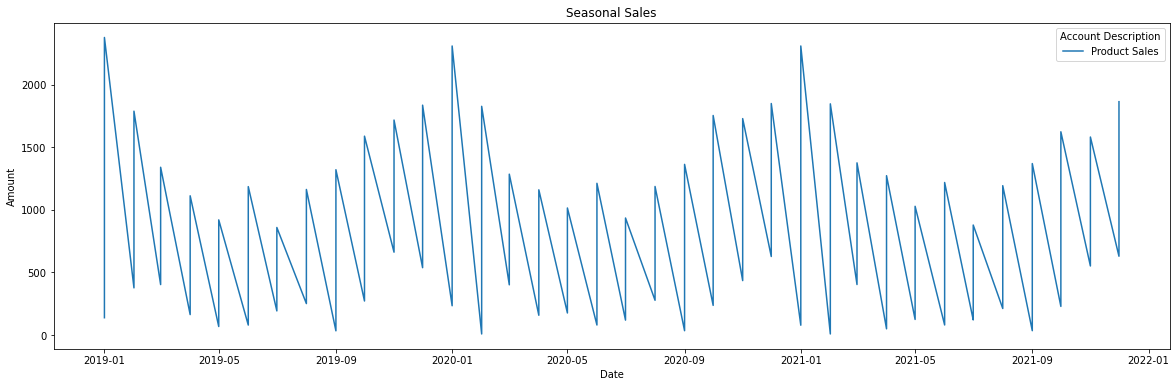

In [83]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y="Amount" ,hue="Account Description",estimator=None , data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
# looks a bit dependent on season

Text(0.5, 1.0, 'Seasonal Sales')

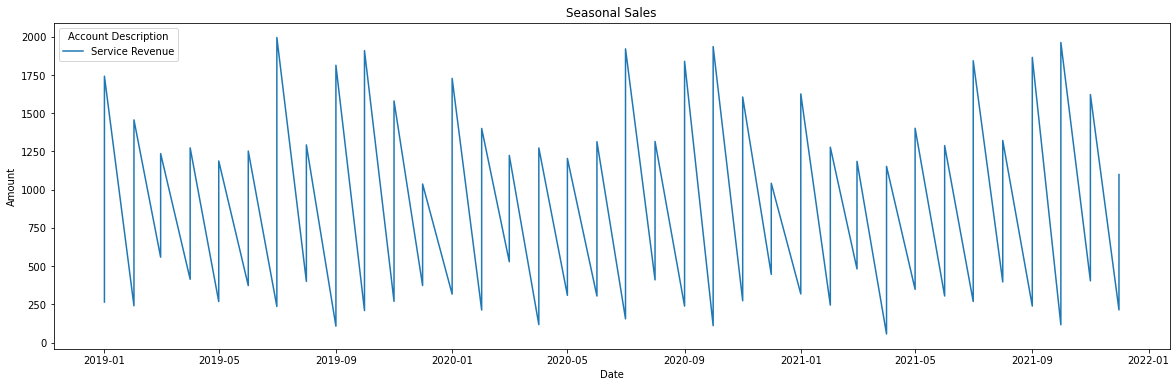

In [84]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y="Amount" ,hue="Account Description",estimator=None , data=df[df['Account Description']=='Service Revenue']).set_title('Service Revenue ')
# service revenue is not following our product sales trend shown above


# Correlation

In [85]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [87]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [ ]:
# each account should have seperate details

In [6]:
# 3. Data preparation 


In [7]:
# 4. Modelling

In [8]:
# 5. Evaluation